In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [2]:
import joblib
import pickle

In [3]:
train = pd.read_csv('train_housing_price_preprocessed.csv')
test = pd.read_csv('test_housing_price_preprocessed.csv')

In [4]:
train.columns

Index(['POSTED_BY_Builder', 'POSTED_BY_Dealer', 'POSTED_BY_Owner', 'RERA',
       'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE', 'LONGITUDE', 'LATITUDE',
       'TARGET(PRICE_IN_LACS)', 'BHK_RK', 'CITY', 'LOCALITY'],
      dtype='object')

In [5]:
#train_x = train.drop(columns=['TARGET(PRICE_IN_LACS)'])
train_x = train.drop(columns=['TARGET(PRICE_IN_LACS)','CITY','LOCALITY'])

In [6]:
train_y = train["TARGET(PRICE_IN_LACS)"]

In [7]:
#test_x = test.drop(columns=["TARGET(PRICE_IN_LACS)"])
test_x = test.drop(columns=["TARGET(PRICE_IN_LACS)",'CITY','LOCALITY'])

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29016 entries, 0 to 29015
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY_Builder      29016 non-null  int64  
 1   POSTED_BY_Dealer       29016 non-null  int64  
 2   POSTED_BY_Owner        29016 non-null  int64  
 3   RERA                   29016 non-null  int64  
 4   BHK_NO.                29016 non-null  int64  
 5   SQUARE_FT              29016 non-null  float64
 6   READY_TO_MOVE          29016 non-null  int64  
 7   LONGITUDE              29016 non-null  float64
 8   LATITUDE               29016 non-null  float64
 9   TARGET(PRICE_IN_LACS)  29016 non-null  float64
 10  BHK_RK                 29016 non-null  int64  
 11  CITY                   29016 non-null  object 
 12  LOCALITY               29005 non-null  object 
dtypes: float64(4), int64(7), object(2)
memory usage: 2.9+ MB


In [8]:
model=LinearRegression()
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
pred_train=model.predict(train_x)
pred_test=model.predict(test_x)

In [10]:
pred_train = abs(pred_train)
pred_test = abs(pred_test)

In [11]:
RMSLE = np.sqrt(mean_squared_log_error(train_y,pred_train))
print('RMSLE of train',RMSLE)

RMSLE of train 0.8791911052889367


In [12]:
test_x.corr()

,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,LONGITUDE,LATITUDE,BHK_RK
POSTED_BY_Builder,1.000000,-0.180755,-0.107298,0.121520,-0.021260,0.001470,-0.187319,-0.026272,3.392203e-03,-3.539902e-02
POSTED_BY_Dealer,-0.180755,1.000000,-0.958455,0.235704,0.108367,-0.006169,-0.174763,0.067546,-3.750127e-02,-1.049967e-02
POSTED_BY_Owner,-0.107298,-0.958455,1.000000,-0.273511,-0.103380,0.005809,0.230990,-0.060662,3.692540e-02,2.088032e-02
RERA,0.121520,0.235704,-0.273511,1.000000,0.009514,-0.001614,-0.363535,0.103211,-7.180131e-02,-5.000248e-03
BHK_NO.,-0.021260,0.108367,-0.103380,0.009514,1.000000,0.005038,0.034652,0.069663,5.092082e-02,4.666666e-02
SQUARE_FT,0.001470,-0.006169,0.005809,-0.001614,0.005038,1.000000,-0.000070,-0.006316,2.956269e-04,4.154771e-04
READY_TO_MOVE,-0.187319,-0.174763,0.230990,-0.363535,0.034652,-0.000070,1.000000,-0.011269,-3.481664e-03,1.939750e-02
LONGITUDE,-0.026272,0.067546,-0.060662,0.103211,0.069663,-0.006316,-0.011269,1.000000,-1.430104e-01,-8.448559e-03
LATITUDE,0.003392,-0.037501,0.036925,-0.071801,0.050921,0.000296,-0.003482,-0.143010,1.000000e+00,-5.508794e-08
BHK_RK,-0.035399,-0.010500,0.020880,-0.005000,0.046667,0.000415,0.019398,-0.008449,-5.508794e-08,1.000000e+00


RMSLE of train 0.7838177074377665


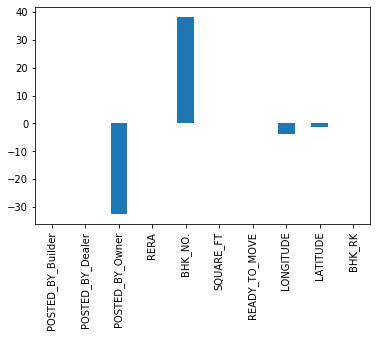

In [13]:
model=Lasso(alpha=15)
model.fit(train_x, train_y)
pd.Series(model.coef_,index=test_x.columns).plot(kind = "bar")
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)
pred_train = abs(pred_train)
RMSLE = np.sqrt(mean_squared_log_error(train_y,pred_train))
print('RMSLE of train',RMSLE)

In [14]:
def run_model(model, train_X, train_y, test_X,filename ):
    model.fit(train_x, train_y)
    pd.Series(model.coef_,index=test_x.columns).plot(kind = "bar")
    pred_train = model.predict(train_x)
    pred_test = model.predict(test_x)
    pred_train = abs(pred_train)
    RMSLE = np.sqrt(mean_squared_log_error(train_y,pred_train))
    print('RMSLE of train',RMSLE)
    score = cross_val_score(model, train_x, train_y, cv = 10, scoring = "neg_mean_squared_log_error" )
    print("Cross validation Score  = ",np.sqrt(np.mean(np.abs(score))))
   # sample["Item_Outlet_Sales"] = pred_test
   # sample.to_csv(filename, index = False)

RMSLE of train 0.7758049134649746


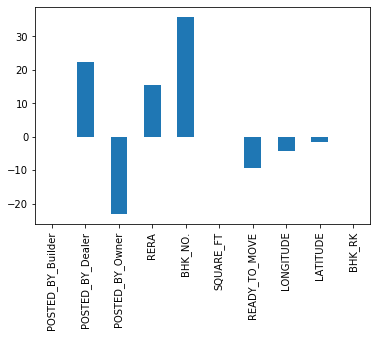

In [9]:
model = ElasticNet(alpha=1, l1_ratio=0.55)
model.fit(train_x, train_y)
pd.Series(model.coef_,index=test_x.columns).plot(kind = "bar")
pred_train = model.predict(train_x)
pred_test = abs(model.predict(test_x))
pred_train = abs(pred_train)
RMSLE = np.sqrt(mean_squared_log_error(train_y,pred_train))
print('RMSLE of train',RMSLE)
#run_model(model, train_x, train_y, test_x, "test_result_ElasticNet_regression.csv" )
pd.DataFrame(pred_test).to_csv("sample_submission.csv",index=False, header=['TARGET(PRICE_IN_LACS)'])

In [19]:
train = pd.read_csv('train_housing_price_preprocessed.csv')
test = pd.read_csv('test_housing_price_preprocessed.csv')
train_x = train.drop(columns=['TARGET(PRICE_IN_LACS)','CITY','LOCALITY'])
train_y = train["TARGET(PRICE_IN_LACS)"]
test_x = test.drop(columns=["TARGET(PRICE_IN_LACS)",'CITY','LOCALITY'])

In [22]:
model = RandomForestRegressor(n_estimators=25,criterion='mse',random_state=1,n_jobs=1)
model.fit(train_x, train_y)
#pd.Series(model.coef_,index=test_x.columns).plot(kind = "bar")
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)
#pred_test = abs(pred_train)
RMSLE = np.sqrt(mean_squared_log_error(train_y,pred_train))
print('RMSLE of train',RMSLE)



RMSLE of train 0.17745011887112538


In [21]:
score = cross_val_score(model, train_x, train_y, cv = 10, scoring = "neg_mean_squared_log_error" )
print("Cross validation Score  = ",np.sqrt(np.mean(np.abs(score))))

Cross validation Score  =  0.3729522869105129


In [10]:
joblib.dump(model, 'model.pkl')

['model.pkl']